<a href="https://colab.research.google.com/github/robert-bob-1/Image-classification/blob/master/proiect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup


tensorflow used as deep learning pipeline itself (keras sequential pipeline)

opencv to remove dodgy images

matplotlib to visualize statistics

In [1]:
%pip install tensorflow opencv-python matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Verify our dependencies

In [2]:
%pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
aiohttp                      3.8.3
aiosignal                    1.2.0
anyio                        3.7.0
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.2
async-timeout                4.0.2
attrs                        22.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.4
boltons                      23.0.0
brotlipy                     0.7.0
cachetools                   4.2.2
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           2.0.4
click                        8.0.4
colorama                     0.4.6
comm  

### Import python dependencies
os to navigate through file structure

In [3]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

### Prepare the labels for our classes and initialize image information

In [4]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

### Limit tensorflow using all the power on our GPU (prevent OOM errors)

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
cpus = tf.config.experimental.list_physical_devices('CPU')
print(cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Load Data

 Load the data:
 
     14,034 images to train the network.

     3,000 images to evaluate how accurately the network learned to classify images.

In [7]:
from zipfile import ZipFile
from PIL import Image
import imghdr

def unzip_data():
    #path to zipped dataset
    # datasetZipPath = 'drive/MyDrive/dataset.zip'
    datasetZipPath = '../dataset.zip'

    # opening the zip file in READ mode
    with ZipFile(datasetZipPath, 'r') as zip:
        # printing all the contents of the zip file
        # zip.printdir()

        print('Extracting all files from zip to local directory...')
        zip.extractall()
        print('Done!')

    return


def load_data():
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category and get images
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
try:
    (train_images, train_labels), (test_images, test_labels) = load_data()
except:
    print('Didn\'t find unzipped data. Trying to unzip file in given zip folder path...')
    unzip_data()
    (train_images, train_labels), (test_images, test_labels) = load_data()

Loading seg_train/seg_train
Loading seg_train/seg_train


100%|████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:01<00:00, 1343.00it/s]



Loading seg_test/seg_test


  0%|                                                                                          | 0/437 [00:00<?, ?it/s]

Loading seg_test/seg_test


100%|██████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 1161.00it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 474/474 [00:00<00:00, 1073.65it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 1131.75it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 525/525 [00:00<00:00, 1192.75it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1428.49it/s]



## 1.3 Visualizing and understanding the data

### 1.3.1 Statistics about our data

- How many training and testing examples do we have ?
- What is the size of the images ?
- What is the proportion of each observed category ?

In [10]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)
Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


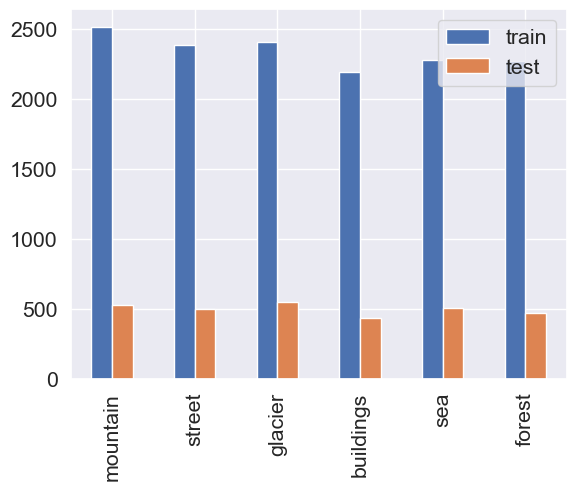

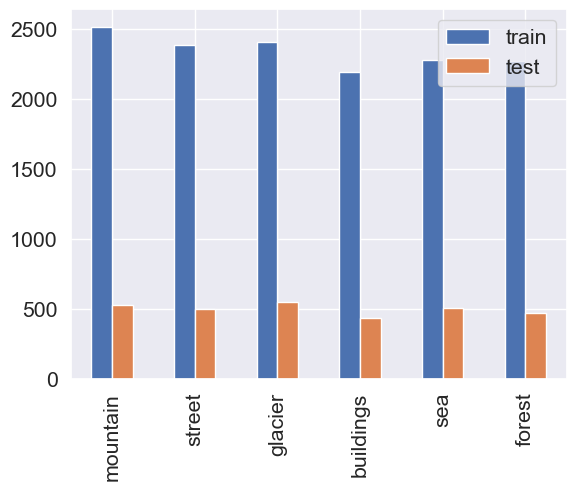

In [11]:
import pandas as pd

# Count each unique category's number of objects
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
              'test' : test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

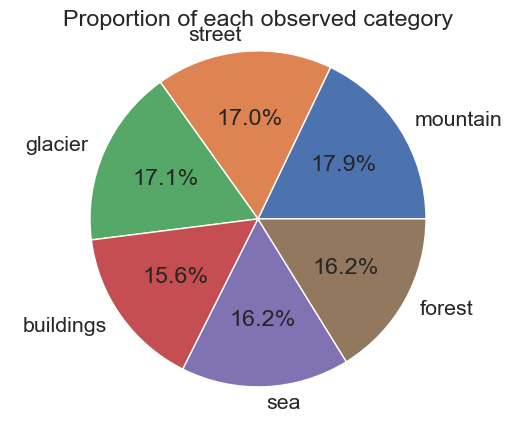

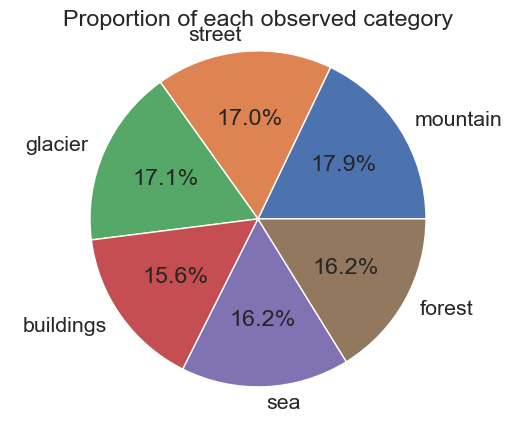

In [12]:
# Based on previously calculated values also create a piechart
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [13]:
# Scale down the pixel data to 0..1 range
train_images = train_images / 255.0 
test_images = test_images / 255.0

### 1.3.2 Visualization of our data

Display a random image from the images array and its correspond label from the labels array.


In [14]:
def display_random_image(class_names, images, labels):    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

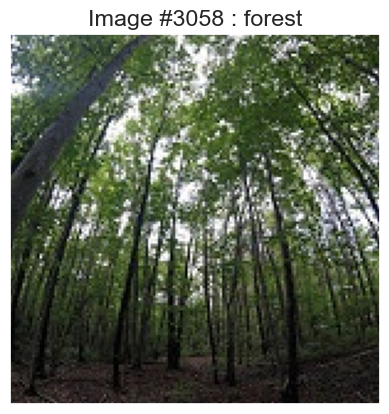

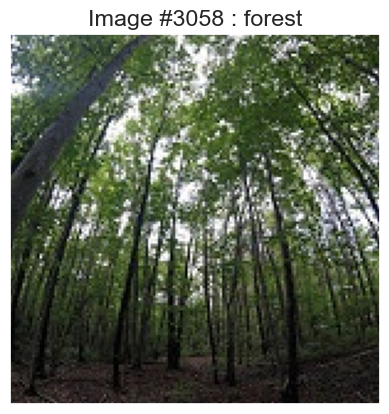

In [15]:
display_random_image(class_names, train_images, train_labels)


Display 25 images from the images array with its corresponding labels


In [16]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        index = np.random.randint(images.shape[0])
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[index], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[index]])
    plt.show()

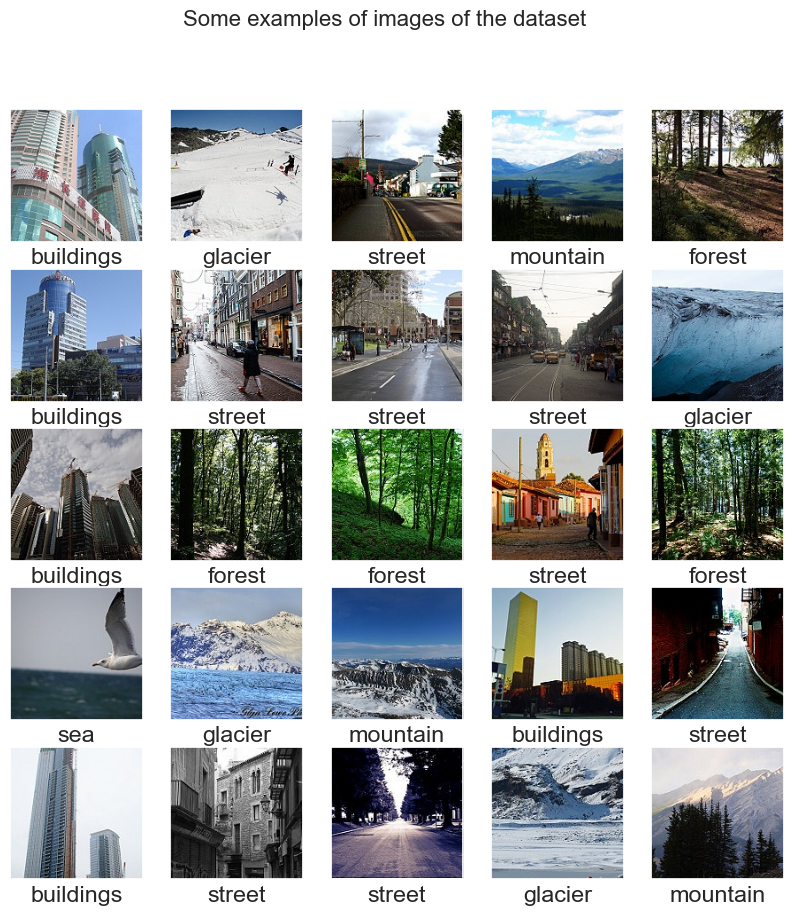

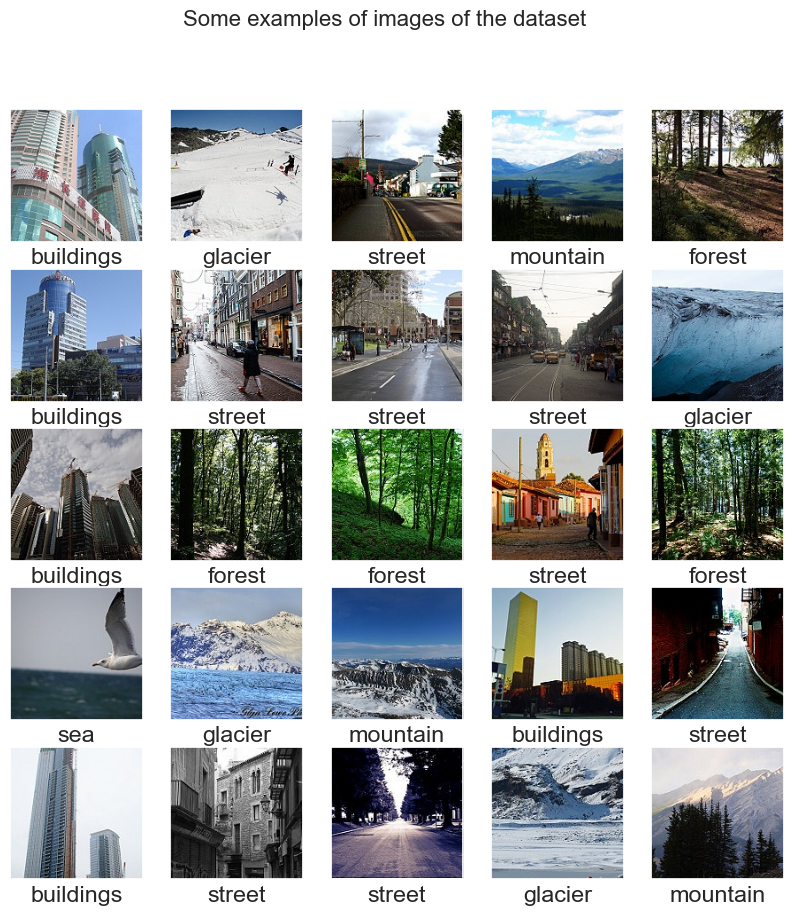

In [17]:
display_examples(class_names, train_images, train_labels)


# 2. Simple Model Creation

Steps are:

1.   Build the model,
2.   Compile the model,
3.   Train / fit the data to the model,
4.   Evaluate the model on the testing set,
5.   Carry out an error analysis of our model.

We can build an easy model composed of different layers such as:

- Conv2D: This layer extracts features by applying 32 filters of size 3x3 over the images.
- MaxPooling2D: This layer performs max pooling, which reduces the size of the input by taking the maximum value within each 2x2 region. Helps us retain essential features while reducing complexity of computations
- Flatten: This layer flattens the output of the previous layer into a 1D array, transforming the multi-dimensional feature maps into a linear representation.
- Relu: Given a value x, returns x if it's positive or else 0.
- Softmax: This layer is a fully connected layer with 6 neurons, representing the probability that the input image belongs to each of the 6 classes. The activation function used is softmax, which provides the probabilities of the different classes, ensuring that the predicted probabilities sum up to 1.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

We will compile this model with these parameters:
- Optimizer='adam'=RMSProp + Momentum. Momentum takes into account past gradients that have better improvements. RMSProp is a root mean squared average of past gradients
- Loss function was chosen as such since its the standard value for classification where each image belongs only to one class


In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Fit the model to the training set.

In [20]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(train_images, train_labels, 32)
test_gen = DataGenerator(test_images, test_labels, 32)


In [21]:
history = model.fit(train_gen, validation_data=test_gen, epochs=10)

Epoch 1/10
Epoch 1/10
439/439 [==============================] - 12s 19ms/step - loss: 1.7623 - accuracy: 0.3108 - val_loss: 1.0971 - val_accuracy: 0.5720
Epoch 2/10
Epoch 2/10
439/439 [==============================] - 8s 18ms/step - loss: 1.1329 - accuracy: 0.5510 - val_loss: 1.0079 - val_accuracy: 0.5880
Epoch 3/10
Epoch 3/10
439/439 [==============================] - 8s 18ms/step - loss: 0.9402 - accuracy: 0.6353 - val_loss: 0.8942 - val_accuracy: 0.6397
Epoch 4/10
Epoch 4/10
439/439 [==============================] - 8s 18ms/step - loss: 0.7835 - accuracy: 0.7043 - val_loss: 0.8296 - val_accuracy: 0.6913
Epoch 5/10
Epoch 5/10
439/439 [==============================] - 8s 18ms/step - loss: 0.6252 - accuracy: 0.7689 - val_loss: 0.7158 - val_accuracy: 0.7370
Epoch 6/10
Epoch 6/10
439/439 [==============================] - 8s 18ms/step - loss: 0.5040 - accuracy: 0.8173 - val_loss: 0.7795 - val_accuracy: 0.7227
Epoch 7/10
Epoch 7/10
439/439 [==============================] - 8s 17ms/st

In [22]:
test_loss = model.evaluate(test_images, test_labels)


94/94 [==============================] - 1s 8ms/step - loss: 1.0579 - accuracy: 0.7473


Let's see how our training went

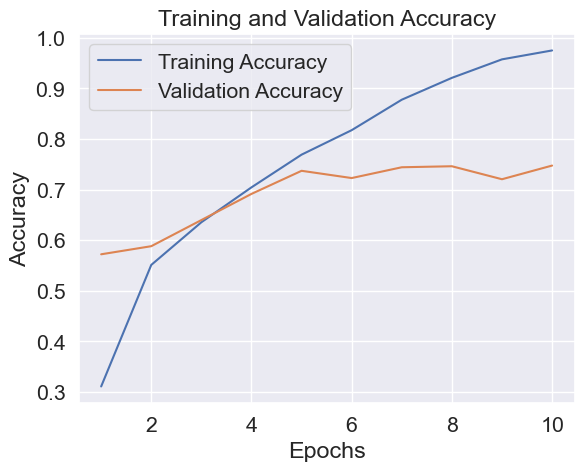

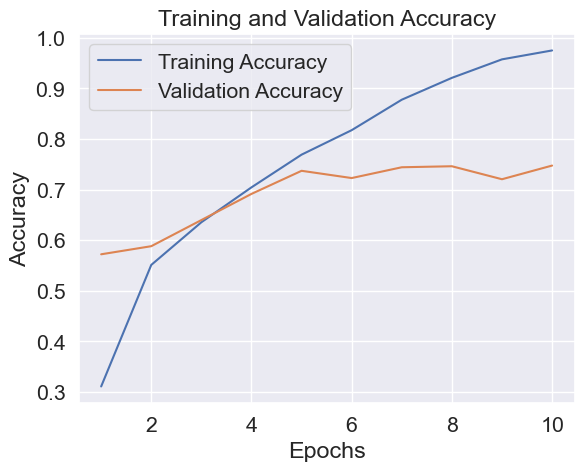

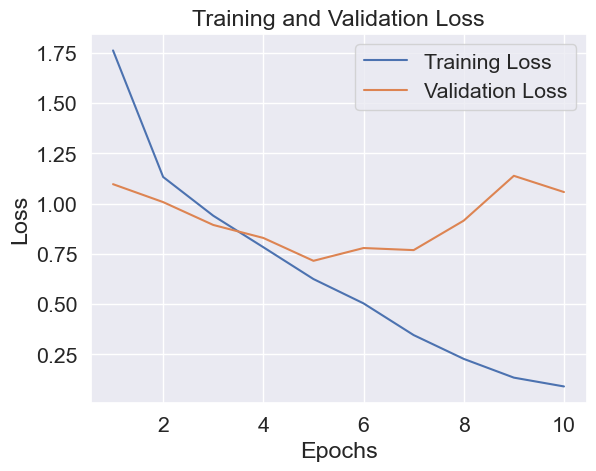

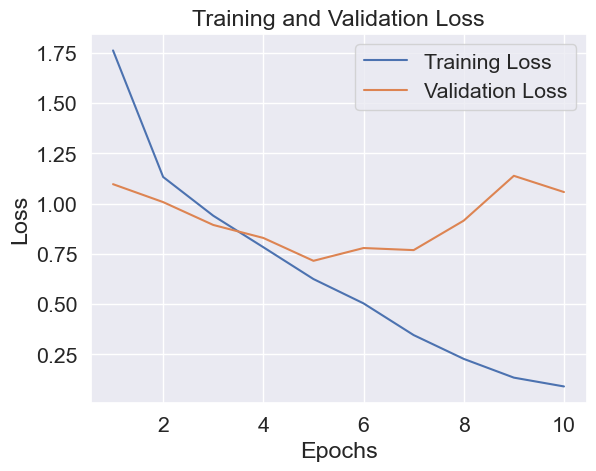

In [23]:
def plot_accuracy_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_accuracy_loss(history)

Underfitting due to only 67% accuracy. Let's test on some random images

94/94 [==============================] - 1s 7ms/step


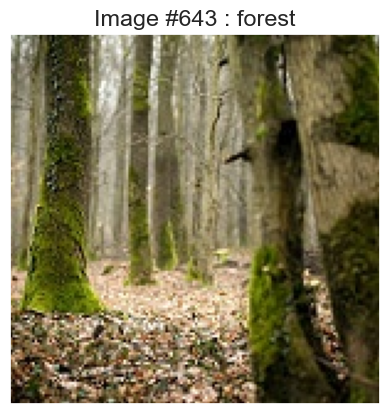

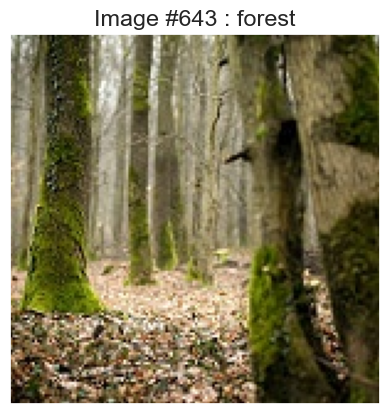

In [24]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

# 3 Error Analysis
Let's try to understand what images are poorly matched.
We will print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels

In [25]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

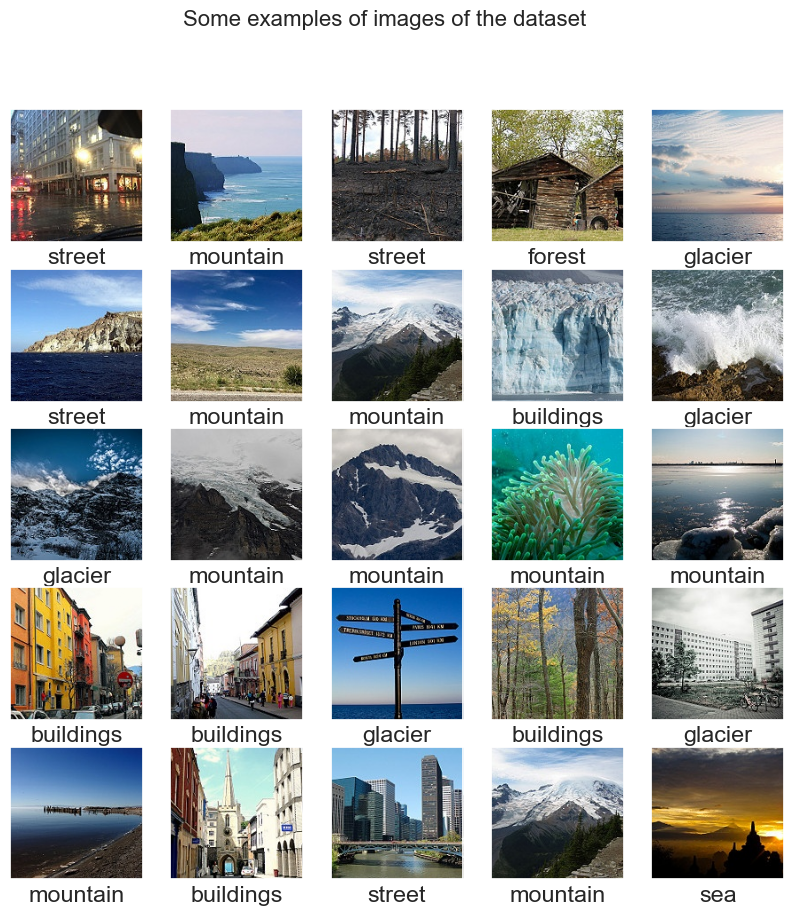

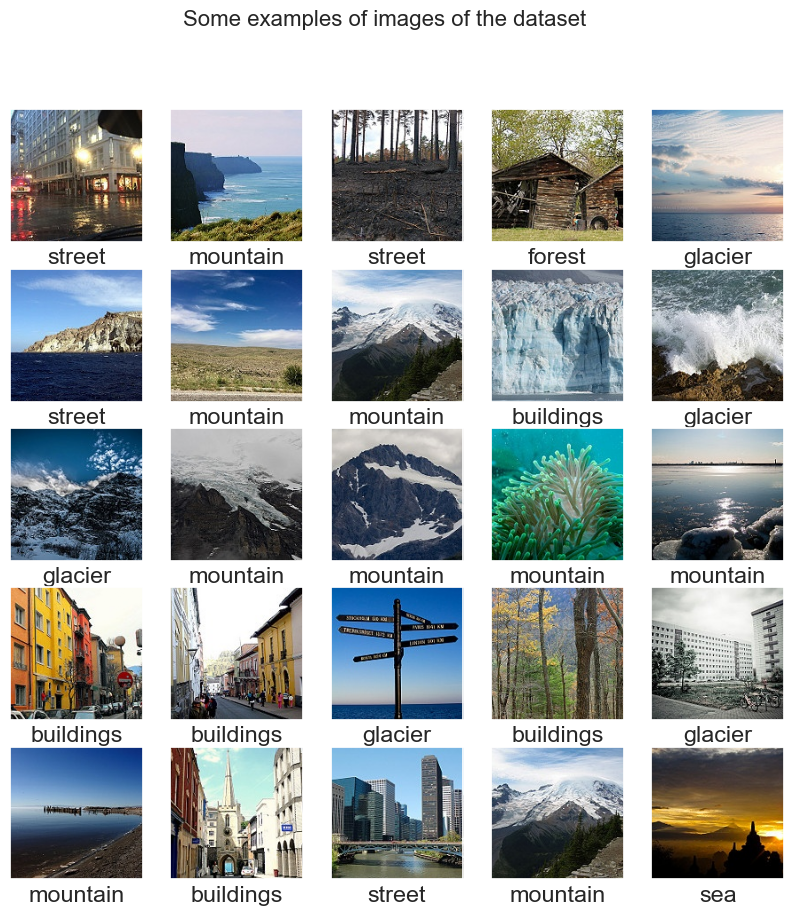

In [26]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

Compute confusion matrix to better illustrate how accurate the model is for each class

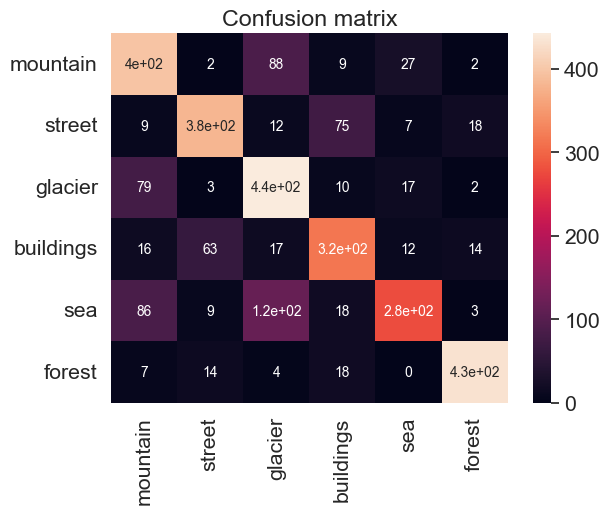

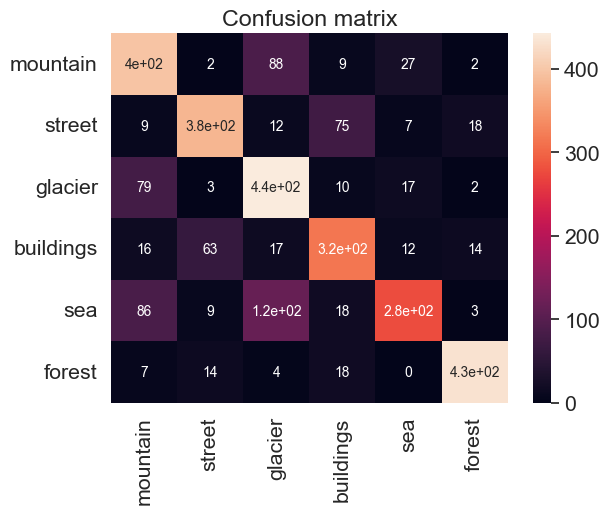

In [27]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

We see our model detects forest and mountains accurately, but
confuses glaciers with mountains, buildings with streets and seas with mountains. 
Often those confusions make sense:
- glaciers are on mountains, 
- buildings in cities have streets near them, 
- and perhaps the sea has repetitive textures similar to mountains along with skies in the picture)

# 4. Feature extraction with VGG ImageNet


In [28]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model2 = VGG16(weights='imagenet', include_top=False)

In [29]:
# class DataGenerator2(Sequence):
#     def __init__(self, x_set, batch_size):
#         self.x = x_set
#         self.batch_size = batch_size

#     def __len__(self):
#         return int(np.ceil(len(self.x) / float(self.batch_size)))

#     def __getitem__(self, idx):
#         batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
#         return batch_x

# train_gen2 = DataGenerator2(train_images, 32)
# test_gen2 = DataGenerator2(test_images, 32)

In [30]:
train_features = model2.predict(train_gen)
test_features = model2.predict(test_gen)

94/94 [==============================] - 5s 48ms/step


## 4.1 Visualize the features through PCA (Principal Component Analysis)

In [31]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

Apply PCA using decomposition from scikit

In [32]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # reprezentam
C1 = C[:,0]
C2 = C[:,1]

Show the plot with decomposed features for each class type

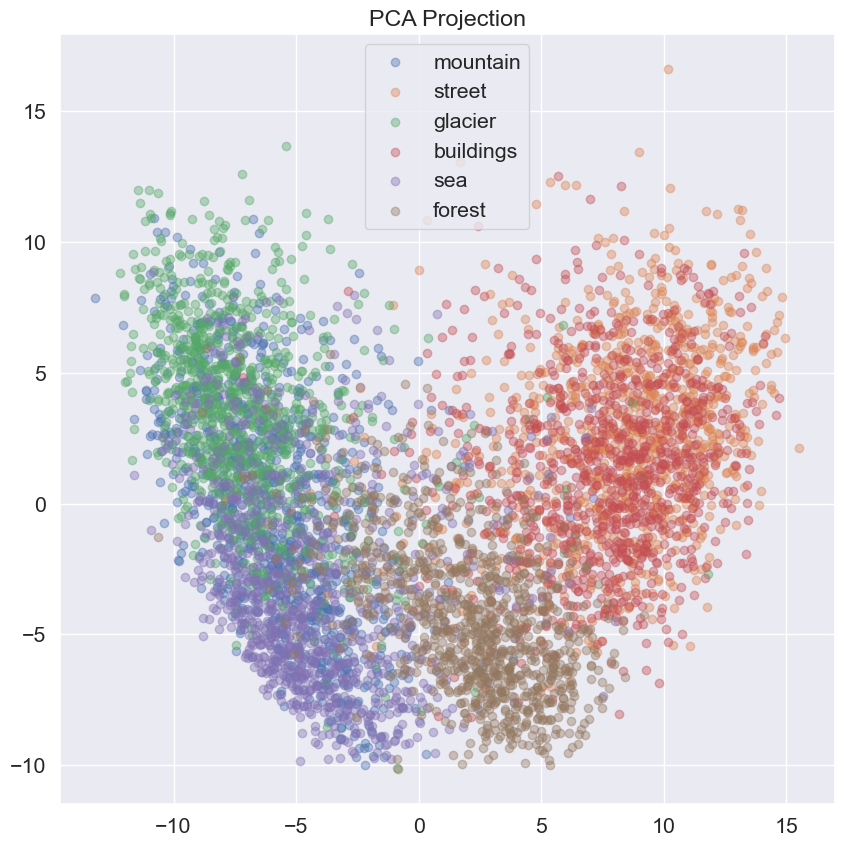

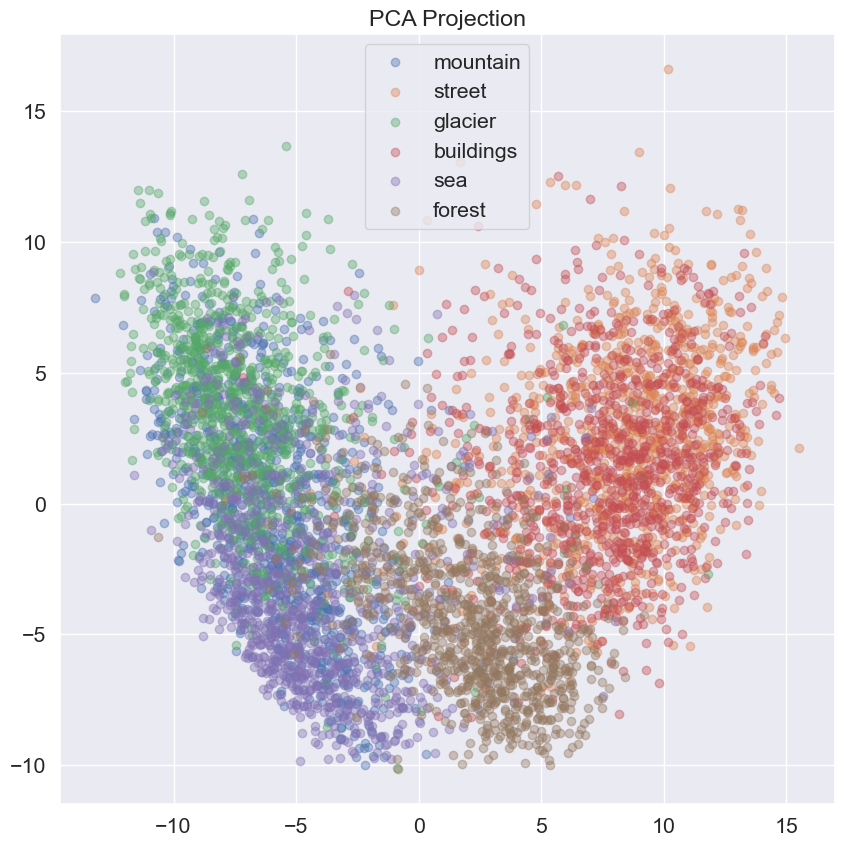

In [33]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

Here we can notice that VGG algorithm classifies glaciers and mountains similarly, as well as streets and buildings.

## 4.2 Training on the features extracted from VGG
Train a simple one-layer NN.

In [34]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model3.fit(train_gen, validation_data=test_gen, epochs=5)

Epoch 1/10
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/flatten_1/Reshape' defined at (most recent call last):
    File "C:\ProgramData\miniconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\miniconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\miniconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\miniconda3\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\ProgramData\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rober\AppData\Local\Temp\ipykernel_17436\32135146.py", line 9, in <module>
      history2 = model3.fit(train_gen, validation_data=test_gen, epochs=10)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_1/flatten_1/Reshape'
Input to reshape is a tensor with 2160000 values, but the requested shape requires a multiple of 8192
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_train_function_29159]

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/flatten_1/Reshape' defined at (most recent call last):
    File "C:\ProgramData\miniconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\miniconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\miniconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\ProgramData\miniconda3\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\ProgramData\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\rober\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\rober\AppData\Local\Temp\ipykernel_17436\32135146.py", line 9, in <module>
      history2 = model3.fit(train_gen, validation_data=test_gen, epochs=10)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\miniconda3\lib\site-packages\keras\layers\reshaping\flatten.py", line 104, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_1/flatten_1/Reshape'
Input to reshape is a tensor with 2160000 values, but the requested shape requires a multiple of 8192
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_train_function_29159]

In [ ]:
plot_accuracy_loss(history2)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)